# 4 & 5 - Preprocessing & Modeling

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('Data/clean-nyccds', index_col=0)

In [2]:
df.head()

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,100,72.2,34420,60978,0.77,8.8,12.7,14.4,20.9,3.8
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,100,72.2,93119,90016,-0.03,8.8,12.7,14.4,20.9,3.8
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,100,33.3,164407,163277,-0.01,19.3,11.4,14.4,20.9,3.8
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,94,59.1,87479,103245,0.18,11.3,8.2,14.4,20.9,3.8
4,Manhattan CD 5,3127,49436,23,7,3,13,29.4,0.9,1.7,...,95,59.1,44028,51673,0.17,11.3,8.2,14.4,20.9,3.8


In [3]:
df.describe()

,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,female_20_24,...,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000
mean,18464.254237,61025.915254,22.898305,3.677966,6.915254,25.694915,10.205085,2.667797,2.720339,3.540678,...,83.779661,32.264407,135681.491525,138503.050847,0.038475,19.940678,20.872881,21.016949,2.090000e+01,4.488136
std,16401.896106,21819.461407,13.101323,1.665478,4.035567,8.987068,4.627594,0.838603,0.683243,0.844887,...,15.419499,24.355979,45806.188054,43455.936765,0.111801,6.824982,5.383334,3.745487,3.583210e-15,0.992226
min,1725.000000,20518.000000,1.000000,1.000000,1.000000,8.000000,2.600000,0.900000,1.100000,1.800000,...,39.000000,1.100000,34420.000000,51673.000000,-0.100000,7.200000,8.200000,14.400000,2.090000e+01,2.800000
25%,4633.500000,47148.500000,12.000000,2.500000,4.000000,19.500000,7.250000,2.200000,2.300000,3.000000,...,73.000000,10.650000,105239.000000,107451.000000,0.000000,15.000000,18.150000,20.300000,2.090000e+01,3.900000
50%,14476.000000,56013.000000,19.000000,3.000000,6.000000,23.000000,8.800000,2.600000,2.700000,3.500000,...,87.000000,27.500000,128313.000000,132003.000000,0.020000,20.200000,21.300000,23.100000,2.090000e+01,4.400000
75%,24828.000000,66646.500000,32.000000,4.500000,8.500000,31.000000,12.350000,3.300000,3.100000,4.000000,...,98.500000,53.150000,166458.000000,171937.000000,0.055000,24.600000,23.700000,23.100000,2.090000e+01,4.400000
max,70686.000000,151357.000000,54.000000,9.000000,20.000000,47.000000,29.400000,4.800000,4.200000,6.900000,...,100.000000,82.900000,242952.000000,247354.000000,0.770000,35.600000,36.800000,25.100000,2.090000e+01,6.300000


In [4]:
df.drop([col for col in df.columns if 'nyc' in col],axis=1,inplace=True)
df.drop([col for col in df.columns if 'boro' in col],axis=1,inplace=True)

I'm going to jump right in with a simple KMeans clustering algorithm to divide the city neighborhoods up into different groups and see which groups Beanie Coffee Shops are currently located in.

In [5]:
from sklearn.preprocessing import StandardScaler

x=df.drop(columns=('cd_short_title'))

scaler = StandardScaler()
X = scaler.fit_transform(x)

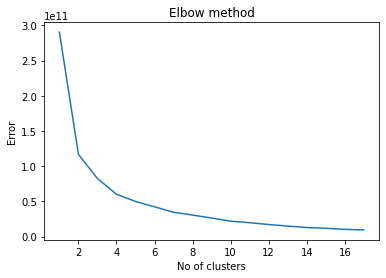

In [6]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 18), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

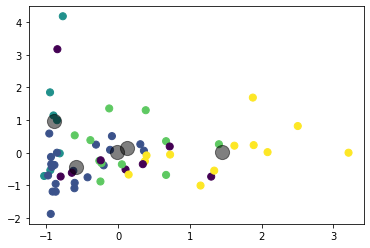

In [7]:
kmeans5 = KMeans(n_clusters=5, random_state=123)
y_kmeans5 = kmeans5.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans5, s=50, cmap='viridis')

centers = kmeans5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [8]:
df['cluster'] = y_kmeans5

In [9]:
df[['cd_short_title','cluster']].to_csv('basic_neighborhood_clusters')
#saving this to display in tableau map for the report

In [10]:
df2 = pd.read_csv('Data/clean_locations.csv', index_col=0)
df2.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD
1,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1
2,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6
3,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1
4,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3
5,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6


In [11]:
df2.merge(df[['cd_short_title','cluster']], how="left", left_on='CD', right_on='cd_short_title')

,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD,cd_short_title,cluster
0,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1,Queens CD 1,3
1,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6,Brooklyn CD 6,3
2,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1,Manhattan CD 1,2
3,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3,Manhattan CD 3,2
4,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6,Manhattan CD 6,2
5,8,existing,1500,10036,-73.990338,40.761887,Chelsea and Clinton,Manhattan CD 4,Manhattan CD 4,2
6,9,potential,1700,10011,-74.000502,40.742760,Chelsea and Clinton,Manhattan CD 4,Manhattan CD 4,2
7,10,potential,1600,10014,-74.002722,40.734367,Greenwich Village,Manhattan CD 2,Manhattan CD 2,2


Now we can see the that there are two kinds of neighborhoods that we're seeing our existing stores in (3 and 2), and two of our existing stores are in cluster 3, one in cluster 2. Our potential locations show 1 potential location in cluster 3 and the rest in cluster 2. 

In [12]:
cluster2 = df[df.cluster == 2]
cluster3 = df[df.cluster==3]
cluster2.head(10)

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,cluster
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,2.2,15.5,100,72.2,34420,60978,0.77,8.8,12.7,2
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,2.2,15.5,100,72.2,93119,90016,-0.03,8.8,12.7,2
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,8.4,30.6,100,33.3,164407,163277,-0.01,19.3,11.4,2
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,5.2,17.2,94,59.1,87479,103245,0.18,11.3,8.2,2
4,Manhattan CD 5,3127,49436,23,7,3,13,29.4,0.9,1.7,...,5.2,17.2,95,59.1,44028,51673,0.17,11.3,8.2,2
5,Manhattan CD 6,3056,100985,48,3,6,16,11.7,1.0,2.0,...,3.4,16.6,91,69.7,136152,142745,0.05,9.8,8.8,2
7,Manhattan CD 8,5950,151357,40,5,18,20,10.2,1.6,1.1,...,2.3,10.2,95,75.3,217063,219920,0.01,7.2,14.6,2


In [13]:
cluster3.head(10)

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,cluster
24,Brooklyn CD 1,16461,90331,26,4,11,32,12.7,2.5,2.1,...,4.5,7.0,97,63.0,160338,173083,0.08,15.5,22.0,3
25,Brooklyn CD 2,8646,72520,32,4,15,30,14.9,1.9,2.5,...,25.1,9.3,99,46.4,98620,99617,0.01,11.0,17.9,3
29,Brooklyn CD 6,14220,55680,18,4,8,24,7.8,1.9,1.8,...,7.2,7.0,94,64.1,104054,104709,0.01,9.6,21.2,3
30,Brooklyn CD 7,14476,41988,32,2,4,21,8.3,2.7,2.4,...,2.6,31.3,87,24.4,120063,126230,0.05,27.9,24.0,3
34,Brooklyn CD 11,29344,68671,9,2,2,21,5.4,2.4,2.3,...,1.0,40.8,64,40.2,172129,181981,0.06,22.5,21.3,3
42,Queens CD 1,24737,89164,19,4,10,27,10.9,1.7,1.8,...,6.7,15.5,63,48.3,211220,191105,-0.10,18.1,14.5,3
43,Queens CD 2,12197,69354,6,3,7,20,6.9,1.8,2.1,...,1.5,35.4,77,28.9,109920,113200,0.03,18.8,16.8,3
44,Queens CD 3,19330,53359,10,4,3,13,8.4,2.7,2.5,...,5.0,16.5,71,10.4,169083,171576,0.01,24.0,22.2,3
45,Queens CD 4,14718,54150,8,2,9,19,8.6,3.0,2.3,...,6.4,32.8,76,6.2,167005,172598,0.03,25.6,22.6,3
46,Queens CD 5,41317,66649,7,4,7,21,7.2,3.3,2.5,...,1.4,8.5,74,51.7,165911,169190,0.02,16.8,21.9,3


For the next step of modeling I'm going to try to use the data we have on purchases made at the existing stores to predict how much these potential neigborhoods could make.

## Modeling

In [14]:
purchases = pd.read_csv('Data/clean-purchases-april', index_col=0)

In [15]:
p1 = (purchases.groupby(by='sales_outlet_id', axis=0).sum())[['quantity', 'line_item_amount']]
p1

,quantity,line_item_amount
sales_outlet_id,,
3,23620,77213.23
5,24029,76894.47
8,24109,79528.25


In [16]:
p2 = (purchases.groupby(by='sales_outlet_id', axis=0).count())['transaction_id']
p2

sales_outlet_id
3    16829
5    15994
8    17071
Name: transaction_id, dtype: int64

In [17]:
pdums = pd.get_dummies(purchases[['day_of_week','product_group','gender', 'customer_since']])

In [18]:
pdums = pd.concat([purchases,pdums],axis=1)

In [19]:
p3 = pdums.groupby(by='sales_outlet_id', axis=0).sum()[['customer_since',
                                                        'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
                                                        'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
                                                        'day_of_week_Wednesday', 'product_group_Add-ons',
                                                        'product_group_Beverages', 'product_group_Food',
                                                        'product_group_Merchandise', 'product_group_Whole Bean/Teas',
                                                        'gender_F', 'gender_M', 'gender_N']]

In [20]:
outlets = pd.concat([p1,p2,p3], axis=1)

In [21]:
outlets = outlets.drop(columns='customer_since').reset_index()

In [22]:
outlets

,sales_outlet_id,quantity,line_item_amount,transaction_id,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,product_group_Add-ons,product_group_Beverages,product_group_Food,product_group_Merchandise,product_group_Whole Bean/Teas,gender_F,gender_M,gender_N
0,3,23620,77213.23,16829,2355.0,3048.0,2184.0,2051.0,2291.0,2392.0,2508.0,488.0,13514.0,2420.0,94.0,313.0,4296.0,3226.0,9307.0
1,5,24029,76894.47,15994,2240.0,2742.0,2329.0,2024.0,2249.0,2154.0,2256.0,982.0,11902.0,2634.0,115.0,361.0,3248.0,2107.0,10639.0
2,8,24109,79528.25,17071,2342.0,2681.0,2413.0,2571.0,2291.0,2432.0,2341.0,778.0,13230.0,2562.0,36.0,465.0,3307.0,2889.0,10875.0


Outlets we have an overview of the major features on transactions at our three existing locations, such as how many sales occurred in the month of april and on each day of the week, how many purchases were made of each product type and group, and how many customers of each gender shopped at the store and the total of sales for month. 

In [23]:
clusters = pd.concat([cluster2,cluster3], axis=0)

In [24]:
clusters = clusters.merge(df2, how="right", right_on='CD', left_on='cd_short_title')
clusters

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,under18_rate,cluster,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,12.7,2,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,12.7,2,10,potential,1600,10014,-74.002722,40.734367,Greenwich Village,Manhattan CD 2
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,11.4,2,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,8.2,2,8,existing,1500,10036,-73.990338,40.761887,Chelsea and Clinton,Manhattan CD 4
4,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,8.2,2,9,potential,1700,10011,-74.000502,40.742760,Chelsea and Clinton,Manhattan CD 4
5,Manhattan CD 6,3056,100985,48,3,6,16,11.7,1.0,2.0,...,8.8,2,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6
6,Brooklyn CD 6,14220,55680,18,4,8,24,7.8,1.9,1.8,...,21.2,3,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6
7,Queens CD 1,24737,89164,19,4,10,27,10.9,1.7,1.8,...,14.5,3,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1


In [25]:
clusters = clusters.drop(columns=['Neighorhood','CD','store_postal_code','store_longitude','store_latitude'])

In [26]:
clusters

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,cluster,sales_outlet_id,sales_outlet_type,store_square_feet
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,72.2,34420,60978,0.77,8.8,12.7,2,5,existing,900
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,72.2,93119,90016,-0.03,8.8,12.7,2,10,potential,1600
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,33.3,164407,163277,-0.01,19.3,11.4,2,6,potential,1000
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,59.1,87479,103245,0.18,11.3,8.2,2,8,existing,1500
4,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,59.1,87479,103245,0.18,11.3,8.2,2,9,potential,1700
5,Manhattan CD 6,3056,100985,48,3,6,16,11.7,1.0,2.0,...,69.7,136152,142745,0.05,9.8,8.8,2,7,potential,1200
6,Brooklyn CD 6,14220,55680,18,4,8,24,7.8,1.9,1.8,...,64.1,104054,104709,0.01,9.6,21.2,3,4,potential,1300
7,Queens CD 1,24737,89164,19,4,10,27,10.9,1.7,1.8,...,48.3,211220,191105,-0.10,18.1,14.5,3,3,existing,1300


# Change to the Modeling Approach.
The original approach to this problems was to model off of the stores and their total revenue, but instead I've decided to compare transactions by customers compared to the neighborhood where they make their purchases.

In [27]:
purchases.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,customer_since,gender,age,birthday,product_group,product_category,product_type,product,new_product_yn,day_of_week
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,1,F,37.0,2-25,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,N,Monday
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,1,N,29.0,7-29,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,N,Monday
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,1,N,25.0,2-23,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,N,Monday
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,0,F,21.0,2-6,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,N,Monday
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,2,M,53.0,1-29,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,N,Monday


In [28]:
customers = pd.read_csv('Data/customer.csv')

In [29]:
customers['age'] = 2019-customers['birth_year']

In [30]:
customers['age_group'] = 0
for i in range(len(customers['age_group'])):
    if customers['age'][i] >= 10 and customers['age'][i] <=14:
        customers['age_group'][i] = '10-14'
    elif customers['age'][i] >= 15 and customers['age'][i] <=19:
        customers['age_group'][i] = '15-19'
    elif customers['age'][i] >= 20 and customers['age'][i] <=24:
        customers['age_group'][i] = '20-24'
    elif customers['age'][i] >= 25 and customers['age'][i] <=29:
        customers['age_group'][i] = '25-29'
    elif customers['age'][i] >= 30 and customers['age'][i] <=34:
        customers['age_group'][i] = '30-34'
    elif customers['age'][i] >= 35 and customers['age'][i] <=39:
        customers['age_group'][i] = '35-39'
    elif customers['age'][i] >= 40 and customers['age'][i] <=44:
        customers['age_group'][i] = '40-44'
    elif customers['age'][i] >= 45 and customers['age'][i] <=49:
        customers['age_group'][i] = '45-49'
    elif customers['age'][i] >= 50 and customers['age'][i] <=54:
        customers['age_group'][i] = '50-54'
    elif customers['age'][i] >= 55 and customers['age'][i] <=59:
        customers['age_group'][i] = '55-59'
    elif customers['age'][i] >= 60 and customers['age'][i] <=64:
        customers['age_group'][i] = '60-64'
    elif customers['age'][i] >= 65 and customers['age'][i] <=69:
        customers['age_group'][i] = '65-69'
    elif customers['age'][i] >= 70 and customers['age'][i] <=74:
        customers['age_group'][i] = '70-74'
    elif customers['age'][i] >= 75 and customers['age'][i] <=79:
        customers['age_group'][i] = '75-79'
    elif customers['age'][i] >= 80 and customers['age'][i] <=84:
        customers['age_group'][i] = '80-84'
    elif customers['age'][i] >= 85:
        customers['age_group'][i] = '85+'

In [31]:
customers['gender_age_group'] = "" 
for i in range(len(customers['age_group'])):
    customers['gender_age_group'][i] = str(customers['gender'][i]) + " " + str(customers['age_group'][i])
customers.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,age,age_group,gender_age_group
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,69,65-69,M 65-69
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,69,65-69,M 65-69
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,69,65-69,M 65-69
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,69,65-69,M 65-69
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,68,65-69,M 65-69


In [32]:
demo = purchases.merge(customers[['customer_id','gender_age_group']], how='outer', on='customer_id')

In [33]:
demo.customer_id.value_counts()

0       25033
548        31
8285       31
3          31
8341       29
        ...  
5668        1
359         1
5076        1
427         1
5147        1
Name: customer_id, Length: 2249, dtype: int64

In [34]:
demo.isnull().sum()

transaction_id          1
transaction_date        1
transaction_time        1
sales_outlet_id         1
staff_id                1
customer_id             0
instore_yn              1
order                   1
line_item_id            1
product_id              1
quantity                1
line_item_amount        1
unit_price              1
promo_item_yn           1
home_store              1
customer_since          1
gender                  1
age                     1
birthday                1
product_group           1
product_category        1
product_type            1
product                 1
new_product_yn          1
day_of_week             1
gender_age_group    25042
dtype: int64

In [35]:
demo.gender_age_group.fillna('0', inplace=True)

In [36]:
demo = demo[demo['transaction_id'].notnull()]

In [37]:
demo.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,gender,age,birthday,product_group,product_category,product_type,product,new_product_yn,day_of_week,gender_age_group
0,7.0,2019-04-01,12:04:43,3.0,12.0,558,N,1.0,1.0,52.0,...,F,37.0,2-25,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,N,Monday,F 35-39
1,1539.0,2019-04-01,16:49:47,3.0,12.0,558,N,1.0,1.0,29.0,...,F,37.0,2-25,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Rg,N,Monday,F 35-39
2,2188.0,2019-04-01,15:01:02,3.0,17.0,558,Y,1.0,1.0,48.0,...,F,37.0,2-25,Beverages,Tea,Brewed Black tea,English Breakfast Rg,N,Monday,F 35-39
3,78.0,2019-04-02,15:24:16,3.0,17.0,558,N,1.0,1.0,60.0,...,F,37.0,2-25,Beverages,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,N,Tuesday,F 35-39
4,14.0,2019-04-03,19:45:56,3.0,12.0,558,N,1.0,1.0,32.0,...,F,37.0,2-25,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Rg,N,Wednesday,F 35-39


In [38]:
demo[demo['sales_outlet_id']!= demo['home_store']]['home_store'].value_counts()

1.0    25042
Name: home_store, dtype: int64

Having gender and age groups that align with the gender and age groups in the census data, we can look at the makeup of the neighborhood and the purchasing patterns of the residents. 

In [39]:
products = pd.read_csv('Data/product.csv')

In [40]:
demo = demo.merge(products[['product_id','current_wholesale_price']], how='left', on='product_id')

In [41]:
demo.head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,age,birthday,product_group,product_category,product_type,product,new_product_yn,day_of_week,gender_age_group,current_wholesale_price
0,7.0,2019-04-01,12:04:43,3.0,12.0,558,N,1.0,1.0,52.0,...,37.0,2-25,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,N,Monday,F 35-39,0.63
1,1539.0,2019-04-01,16:49:47,3.0,12.0,558,N,1.0,1.0,29.0,...,37.0,2-25,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Rg,N,Monday,F 35-39,0.50
2,2188.0,2019-04-01,15:01:02,3.0,17.0,558,Y,1.0,1.0,48.0,...,37.0,2-25,Beverages,Tea,Brewed Black tea,English Breakfast Rg,N,Monday,F 35-39,0.63
3,78.0,2019-04-02,15:24:16,3.0,17.0,558,N,1.0,1.0,60.0,...,37.0,2-25,Beverages,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,N,Tuesday,F 35-39,2.81
4,14.0,2019-04-03,19:45:56,3.0,12.0,558,N,1.0,1.0,32.0,...,37.0,2-25,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Rg,N,Wednesday,F 35-39,0.60


In [42]:
demo = demo[['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'order',
       'line_item_id', 'product_category', 'quantity', 'line_item_amount',
       'unit_price', 'gender_age_group',
       'current_wholesale_price']]

In [43]:
demo['profit'] = 0.0
for i in range(len(demo)):
    demo['profit'][i] = float(demo['line_item_amount'][i] - float((demo['quantity'][i]*demo['current_wholesale_price'][i])))

In [44]:
demo.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,order,line_item_id,product_category,quantity,line_item_amount,unit_price,gender_age_group,current_wholesale_price,profit
0,7.0,2019-04-01,12:04:43,3.0,1.0,1.0,Tea,1.0,2.50,2.50,F 35-39,0.63,1.87
1,1539.0,2019-04-01,16:49:47,3.0,1.0,1.0,Coffee,1.0,2.50,2.50,F 35-39,0.50,2.00
2,2188.0,2019-04-01,15:01:02,3.0,1.0,1.0,Tea,2.0,5.00,2.50,F 35-39,0.63,3.74
3,78.0,2019-04-02,15:24:16,3.0,1.0,1.0,Drinking Chocolate,1.0,3.75,3.75,F 35-39,2.81,0.94
4,14.0,2019-04-03,19:45:56,3.0,1.0,1.0,Coffee,1.0,3.00,3.00,F 35-39,0.60,2.40


In [45]:
demo2 = demo.groupby(['sales_outlet_id','gender_age_group','product_category']).sum()

In [46]:
demo2.head()

transaction_id   order  \
sales_outlet_id gender_age_group product_category                             
3.0             0                Bakery                   1329127.0  1152.0   
                                 Branded                    50512.0   542.0   
                                 Coffee                   4294954.0  3305.0   
                                 Coffee beans               77153.0   726.0   
                                 Drinking Chocolate        907157.0   684.0   

                                                     line_item_id  quantity  \
sales_outlet_id gender_age_group product_category                             
3.0             0                Bakery                    5467.0    1168.0   
                                 Branded                    170.0      62.0   
                                 Coffee                    3299.0    4840.0   
                                 Coffee beans               147.0     113.0   
                                 Drinking Chocolate         687.0    1010.0   

                                                     line_item_amount  \
sales_outlet_id gender_age_group product_category                       
3.0             0                Bakery                        4025.0   
                                 Branded                       1222.0   
                                 Coffee                       14736.1   
                                 Coffee beans                  2458.3   
                                 Drinking Chocolate            4218.0   

                                                     unit_price  \
sales_outlet_id gender_age_group product_category                 
3.0             0                Bakery                 4084.00   
                                 Branded                1222.00   
                                 Coffee                 9859.30   
                                 Coffee beans           2458.30   
                                 Drinking Chocolate     2840.75   

                                                     current_wholesale_price  \
sales_outlet_id gender_age_group product_category                              
3.0             0                Bakery                              2658.17   
                                 Branded                              385.28   
                                 Coffee                              1971.86   
                                 Coffee beans                        1966.64   
                                 Drinking Chocolate                  2131.41   

                                                       profit  
sales_outlet_id gender_age_group product_category              
3.0             0                Bakery               1321.28  
                                 Branded               836.72  
                                 Coffee              11788.88  
                                 Coffee beans          491.66  
                                 Drinking Chocolate   1053.20

In [47]:
demo3 = demo2[['profit','quantity']].fillna(0).reset_index()

In [48]:
demo3.head()

,sales_outlet_id,gender_age_group,product_category,profit,quantity
0,3.0,0,Bakery,1321.28,1168.0
1,3.0,0,Branded,836.72,62.0
2,3.0,0,Coffee,11788.88,4840.0
3,3.0,0,Coffee beans,491.66,113.0
4,3.0,0,Drinking Chocolate,1053.20,1010.0


In [49]:
demo3 = demo3.merge(clusters.drop(columns=['cd_short_title','cluster', 'sales_outlet_type']), how='inner', on='sales_outlet_id')

In [50]:
census = [
    'female_15_19', 
    'female_20_24', 
    'female_25_29', 
    'female_30_34', 
    'female_35_39', 
    'female_40_44',
    'female_45_49', 
    'female_50_54', 
    'female_55_59', 
    'female_60_64', 
    'female_65_69', 
    'male_15_19', 
    'male_20_24',
    'male_25_29', 
    'male_30_34', 
    'male_35_39',
    'male_40_44', 
    'male_45_49',  
    'male_50_54',
    'male_55_59',
    'male_60_64',
    'male_65_69',
]

census_dict =dict(zip(demo3['gender_age_group'].unique(), census))


In [51]:
def pct(df):
    for i in range(len(df)):
        if df['gender_age_group'][i] in census_dict.keys():
            col_name = census_dict[df['gender_age_group'][i]]
            df['pop_pct'][i] = df[col_name][i] * df['pop_2010'][i]
        elif df['gender_age_group'][i] == 0:
            df['pop_pct'][i] = df['pop_pct'].mean()
        else: 
            col_name =  df['gender_age_group'][i].split(' ')[1].replace('-','_')
            col_1 = str('female_' + col_name)
            col_2 = str('male_' + col_name)
            df['pop_pct'][i] = (df[col_1][i]+df[col_2][i]) * df['pop_2010'][i]

In [52]:
demo3['pop_pct'] = 0
pct(demo3)
demo3.head()

,sales_outlet_id,gender_age_group,product_category,profit,quantity,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,...,pct_asian_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,store_square_feet,pop_pct
0,3.0,0,Bakery,1321.28,1168.0,24737,89164,19,4,10,...,15.5,63,48.3,211220,191105,-0.1,18.1,14.5,1300,343989
1,3.0,0,Branded,836.72,62.0,24737,89164,19,4,10,...,15.5,63,48.3,211220,191105,-0.1,18.1,14.5,1300,343989
2,3.0,0,Coffee,11788.88,4840.0,24737,89164,19,4,10,...,15.5,63,48.3,211220,191105,-0.1,18.1,14.5,1300,343989
3,3.0,0,Coffee beans,491.66,113.0,24737,89164,19,4,10,...,15.5,63,48.3,211220,191105,-0.1,18.1,14.5,1300,343989
4,3.0,0,Drinking Chocolate,1053.20,1010.0,24737,89164,19,4,10,...,15.5,63,48.3,211220,191105,-0.1,18.1,14.5,1300,343989


In [53]:
demo3 = demo3[['cd_tot_bldgs', 'cd_tot_resunits', 'count_hosp_clinic',
       'count_libraries', 'count_parks', 'count_public_schools',
       'crime_per_1000','pct_bach_deg',
       'pct_clean_strts', 'pct_hh_rent_burd', 'pct_hispanic', 'pct_black_nh',
       'pct_asian_nh', 'pct_served_parks', 'pct_white_nh', 'poverty_rate', 'under18_rate',
       'store_square_feet', 'pop_pct', 'gender_age_group', 'product_category', 'sales_outlet_id','profit',]]

I think I finally have a dataset I can work with to predict the profit and quantity of sales for each age group at each location. 

# Modeling

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LassoLarsCV, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = demo3.drop(columns=['profit','sales_outlet_id'])
y = demo3['profit']

num_features = ['cd_tot_bldgs', 'cd_tot_resunits', 'count_hosp_clinic',
       'count_libraries', 'count_parks', 'count_public_schools',
       'crime_per_1000','pct_bach_deg',
       'pct_clean_strts', 'pct_hh_rent_burd', 'pct_hispanic', 'pct_black_nh',
       'pct_asian_nh', 'pct_served_parks', 'pct_white_nh', 'poverty_rate', 'under18_rate',
       'store_square_feet', 'pop_pct', 'gender_age_group']
onehotAge = OneHotEncoder(handle_unknown='ignore',sparse=False)
onehotProduct = OneHotEncoder(handle_unknown='ignore',sparse=False)
scaler = StandardScaler()
X['gender_age_group'] = onehotAge.fit_transform(np.array(X['gender_age_group']).reshape(len(X),-1))
X['product_category'] = onehotProduct.fit_transform(np.array(X['product_category']).reshape(len(X),-1))
X[num_features] = scaler.fit_transform(X[num_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
en = ElasticNet(random_state=123)
param_grid = {
    'l1_ratio' : [0.3, 0.5, 0.7, 0.9],
    'selection': ['cyclic', 'random'],
    'max_iter': [100, 1000, 2000]
}
en_cv = GridSearchCV(en, param_grid=param_grid, cv=3)
en_cv.fit(X_train, y_train)
en_cv.best_params_

{'l1_ratio': 0.3, 'max_iter': 100, 'selection': 'random'}

In [56]:
enet = ElasticNet(random_state=123, l1_ratio=0.99, max_iter =100, selection='random')
enet.fit(X_train,y_train)
y_pred = enet.predict(X_test)

from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, max_error
print("R2 Score: " + str(r2_score(y_pred, y_test)))
print("Explained Variance Score: " + str(explained_variance_score(y_pred, y_test)))
print("Mean Absolute Error Score: " + str(mean_absolute_error(y_pred, y_test)))
print("Max Error Score: " + str(max_error(y_pred, y_test)))

R2 Score: -15.927690952428538
Explained Variance Score: -15.669275661580336
Mean Absolute Error Score: 354.11833251471364
Max Error Score: 11384.088790411926


In [57]:
forest = RandomForestRegressor(random_state=123)
param_grid = {
    'n_estimators' : [10, 30, 50, 70],
    'max_depth' : range(2,8),
    'n_jobs': [1, 3, 5],
}
forest_cv = GridSearchCV(forest, param_grid=param_grid, cv=3)
forest_cv.fit(X_train, y_train)
forest_cv.best_params_

{'max_depth': 2, 'n_estimators': 50, 'n_jobs': 1}

In [58]:
rfr = RandomForestRegressor(max_depth = 2, n_estimators = 50, n_jobs=5, random_state=123)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("R2 Score: " + str(r2_score(y_pred, y_test)))
print("Explained Variance Score: " + str(explained_variance_score(y_pred, y_test)))
print("Mean Absolute Error Score: " + str(mean_absolute_error(y_pred, y_test)))
print("Max Error Score: " + str(max_error(y_pred, y_test)))

R2 Score: -26.774128585745007
Explained Variance Score: -26.351929507531185
Mean Absolute Error Score: 371.4490642962883
Max Error Score: 12369.674639993531


Now, I need to combine the demographic data with the age groups and categories for the potential stores

In [59]:
groups = demo3['gender_age_group'].unique()
prods = demo3['product_category'].unique()
len(prods)

9

In [60]:
new = pd.DataFrame([item for item in groups]*len(prods)).sort_values(0)
stores = pd.Series([item for item in prods]*len(groups))
col_names = ['gender_age_group','product_category','store_id']
new['product_category'] = stores
store_ids = [4,6,7,9,10]
for id in store_ids:
    new[id] = id
store4 = new[[0,'product_category',4]]
store6 = new[[0,'product_category',6]]
store7 = new[[0,'product_category',7]]
store9 = new[[0,'product_category',9]]
store10 = new[[0,'product_category',10]]
store4.columns = col_names
store6.columns = col_names
store7.columns = col_names
store9.columns = col_names
store10.columns = col_names

In [61]:
full = pd.concat([store4, store6, store7, store9, store10], axis=0)

In [62]:
full = full.merge(clusters.drop(columns=['cd_short_title','cluster', 'sales_outlet_type']), 
                  how='inner', left_on='store_id', right_on='sales_outlet_id')
full['pop_pct'] = 0
pct(full)

In [63]:
full = full[['store_id', 'cd_tot_bldgs', 'cd_tot_resunits', 'count_hosp_clinic',
       'count_libraries', 'count_parks', 'count_public_schools',
       'crime_per_1000','pct_bach_deg',
       'pct_clean_strts', 'pct_hh_rent_burd', 'pct_hispanic', 'pct_black_nh',
       'pct_asian_nh', 'pct_served_parks', 'pct_white_nh', 'poverty_rate', 'under18_rate',
       'store_square_feet', 'pop_pct', 'gender_age_group', 'product_category']]

Now that we have the full data we will process it to be run through the model.

## Random Forest Model

In [64]:
X2 = full.drop(columns='store_id')

X2['gender_age_group'] = onehotAge.transform(np.array(X2['gender_age_group']).reshape(len(X2),-1))
X2['product_category'] = onehotProduct.transform(np.array(X2['product_category']).reshape(len(X2),-1))
X2[num_features] = scaler.fit_transform(X2[num_features])

In [65]:
poss_profit = rfr.predict(X2)

In [66]:
full['profit'] = poss_profit

In [67]:
full.sort_values('product_category')
full.to_csv('full potential predictions forest.csv')

In [68]:
f = full.groupby('store_id').sum()
f

,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,pct_bach_deg,pct_clean_strts,pct_hh_rent_burd,pct_hispanic,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,poverty_rate,under18_rate,store_square_feet,pop_pct,profit
store_id,,,,,,,,,,,,,,,,,,,,
4,4351320,17038080,5508,1224,2448,7344,2386.8,22338.0,29345.4,8812.8,4987.8,2203.2,2142.0,28764,19614.6,2937.6,6487.2,397800,143524494,50192.294011
6,1421064,25262442,12546,1530,3978,12852,4651.2,13249.8,27846.0,11750.4,7680.6,2570.4,9363.6,30600,10189.8,5905.8,3488.4,306000,237176037,49626.305293
7,935136,30901410,14688,918,1836,4896,3580.2,24633.0,29529.0,10740.6,2233.8,1040.4,5079.6,27846,21328.2,2998.8,2692.8,367200,211076928,50630.228186
9,1171674,26226036,11628,612,2142,8874,5538.6,22674.6,29253.6,10373.4,4743.0,1591.2,5263.2,28764,18084.6,3457.8,2509.2,520200,160287786,45361.887454
10,1608336,18546660,5814,918,1836,2448,4590.0,25153.2,29467.8,9210.6,1989.0,673.2,4743.0,30600,22093.2,2692.8,3886.2,489600,133187553,53864.510918


In [69]:
d = demo3.groupby('sales_outlet_id').sum()
d

,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,pct_bach_deg,pct_clean_strts,pct_hh_rent_burd,pct_hispanic,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,poverty_rate,under18_rate,store_square_feet,pop_pct,profit
sales_outlet_id,,,,,,,,,,,,,,,,,,,,
3.0,6060565,21845180,4655,980,2450,6615,2670.5,11368.0,23520.0,9163.0,6517.0,1641.5,3797.5,15435,11833.5,4434.5,3552.5,318500,212241139,48724.35
5.0,370875,9810235,2150,430,2795,4085,1462.0,17673.0,20511.0,6471.5,1397.5,473.0,3332.5,21500,15523.0,1892.0,2730.5,193500,63685329,48511.33
8.0,800261,17912554,7942,418,1463,6061,3782.9,15486.9,19980.4,7085.1,3239.5,1086.8,3594.8,19646,12351.9,2361.7,1713.8,313500,101138748,49019.66


In [70]:
profit = pd.concat([full.groupby('store_id').sum()['profit'],demo3.groupby('sales_outlet_id').sum()['profit']],axis=0).reset_index().sort_values('index')

In [71]:
profit

,index,profit
5,3.0,48724.350000
0,4.0,50192.294011
6,5.0,48511.330000
1,6.0,49626.305293
2,7.0,50630.228186
7,8.0,49019.660000
3,9.0,45361.887454
4,10.0,53864.510918


In [72]:
final = pd.concat([f,d],axis=0).reset_index().sort_values('index')
final['profit'] = profit['profit']
final

,index,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,pct_bach_deg,pct_clean_strts,...,pct_hispanic,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,poverty_rate,under18_rate,store_square_feet,pop_pct,profit
5,3.0,6060565,21845180,4655,980,2450,6615,2670.5,11368.0,23520.0,...,6517.0,1641.5,3797.5,15435,11833.5,4434.5,3552.5,318500,212241139,48724.350000
0,4.0,4351320,17038080,5508,1224,2448,7344,2386.8,22338.0,29345.4,...,4987.8,2203.2,2142.0,28764,19614.6,2937.6,6487.2,397800,143524494,50192.294011
6,5.0,370875,9810235,2150,430,2795,4085,1462.0,17673.0,20511.0,...,1397.5,473.0,3332.5,21500,15523.0,1892.0,2730.5,193500,63685329,48511.330000
1,6.0,1421064,25262442,12546,1530,3978,12852,4651.2,13249.8,27846.0,...,7680.6,2570.4,9363.6,30600,10189.8,5905.8,3488.4,306000,237176037,49626.305293
2,7.0,935136,30901410,14688,918,1836,4896,3580.2,24633.0,29529.0,...,2233.8,1040.4,5079.6,27846,21328.2,2998.8,2692.8,367200,211076928,50630.228186
7,8.0,800261,17912554,7942,418,1463,6061,3782.9,15486.9,19980.4,...,3239.5,1086.8,3594.8,19646,12351.9,2361.7,1713.8,313500,101138748,49019.660000
3,9.0,1171674,26226036,11628,612,2142,8874,5538.6,22674.6,29253.6,...,4743.0,1591.2,5263.2,28764,18084.6,3457.8,2509.2,520200,160287786,45361.887454
4,10.0,1608336,18546660,5814,918,1836,2448,4590.0,25153.2,29467.8,...,1989.0,673.2,4743.0,30600,22093.2,2692.8,3886.2,489600,133187553,53864.510918


In [73]:
final.to_csv('final_outcomes forest.csv')

In [74]:
pd.DataFrame(X.columns,rfr.feature_importances_).sort_index()

,0
0.000000,pct_hh_rent_burd
0.003652,pct_hispanic
0.004502,pct_clean_strts
0.007784,pct_black_nh
0.008775,under18_rate
0.009270,poverty_rate
0.010825,count_parks
0.011433,crime_per_1000
0.011484,cd_tot_resunits
0.011728,store_square_feet


In [75]:
import pickle
pickle.dump(rfr, open('beanie_profit_predictions_forest', 'wb'))

## Lasso Model

In [76]:
full = full[['store_id', 'cd_tot_bldgs', 'cd_tot_resunits', 'count_hosp_clinic',
       'count_libraries', 'count_parks', 'count_public_schools',
       'crime_per_1000','pct_bach_deg',
       'pct_clean_strts', 'pct_hh_rent_burd', 'pct_hispanic', 'pct_black_nh',
       'pct_asian_nh', 'pct_served_parks', 'pct_white_nh', 'poverty_rate', 'under18_rate',
       'store_square_feet', 'pop_pct', 'gender_age_group', 'product_category']]

X2 = full.drop(columns='store_id')

X2['gender_age_group'] = onehotAge.transform(np.array(X2['gender_age_group']).reshape(len(X2),-1))
X2['product_category'] = onehotProduct.transform(np.array(X2['product_category']).reshape(len(X2),-1))
X2[num_features] = scaler.fit_transform(X2[num_features])

poss_profit = enet.predict(X2)
full['profit'] = poss_profit
full.sort_values('product_category')
full.to_csv('full potential predictions lasso.csv')
f = full.groupby('store_id').sum()
f

,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,pct_bach_deg,pct_clean_strts,pct_hh_rent_burd,pct_hispanic,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,poverty_rate,under18_rate,store_square_feet,pop_pct,profit
store_id,,,,,,,,,,,,,,,,,,,,
4,4351320,17038080,5508,1224,2448,7344,2386.8,22338.0,29345.4,8812.8,4987.8,2203.2,2142.0,28764,19614.6,2937.6,6487.2,397800,143524494,57844.519239
6,1421064,25262442,12546,1530,3978,12852,4651.2,13249.8,27846.0,11750.4,7680.6,2570.4,9363.6,30600,10189.8,5905.8,3488.4,306000,237176037,54745.745833
7,935136,30901410,14688,918,1836,4896,3580.2,24633.0,29529.0,10740.6,2233.8,1040.4,5079.6,27846,21328.2,2998.8,2692.8,367200,211076928,58877.492162
9,1171674,26226036,11628,612,2142,8874,5538.6,22674.6,29253.6,10373.4,4743.0,1591.2,5263.2,28764,18084.6,3457.8,2509.2,520200,160287786,48990.559843
10,1608336,18546660,5814,918,1836,2448,4590.0,25153.2,29467.8,9210.6,1989.0,673.2,4743.0,30600,22093.2,2692.8,3886.2,489600,133187553,61544.602717


In [77]:
profit2 = pd.concat([full.groupby('store_id').sum()['profit'],demo3.groupby('sales_outlet_id').sum()['profit']],axis=0).reset_index().sort_values('index')

In [78]:
final2 = pd.concat([f,d],axis=0).reset_index().sort_values('index')
final2['profit'] = profit2['profit']
final2

,index,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,pct_bach_deg,pct_clean_strts,...,pct_hispanic,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,poverty_rate,under18_rate,store_square_feet,pop_pct,profit
5,3.0,6060565,21845180,4655,980,2450,6615,2670.5,11368.0,23520.0,...,6517.0,1641.5,3797.5,15435,11833.5,4434.5,3552.5,318500,212241139,48724.350000
0,4.0,4351320,17038080,5508,1224,2448,7344,2386.8,22338.0,29345.4,...,4987.8,2203.2,2142.0,28764,19614.6,2937.6,6487.2,397800,143524494,57844.519239
6,5.0,370875,9810235,2150,430,2795,4085,1462.0,17673.0,20511.0,...,1397.5,473.0,3332.5,21500,15523.0,1892.0,2730.5,193500,63685329,48511.330000
1,6.0,1421064,25262442,12546,1530,3978,12852,4651.2,13249.8,27846.0,...,7680.6,2570.4,9363.6,30600,10189.8,5905.8,3488.4,306000,237176037,54745.745833
2,7.0,935136,30901410,14688,918,1836,4896,3580.2,24633.0,29529.0,...,2233.8,1040.4,5079.6,27846,21328.2,2998.8,2692.8,367200,211076928,58877.492162
7,8.0,800261,17912554,7942,418,1463,6061,3782.9,15486.9,19980.4,...,3239.5,1086.8,3594.8,19646,12351.9,2361.7,1713.8,313500,101138748,49019.660000
3,9.0,1171674,26226036,11628,612,2142,8874,5538.6,22674.6,29253.6,...,4743.0,1591.2,5263.2,28764,18084.6,3457.8,2509.2,520200,160287786,48990.559843
4,10.0,1608336,18546660,5814,918,1836,2448,4590.0,25153.2,29467.8,...,1989.0,673.2,4743.0,30600,22093.2,2692.8,3886.2,489600,133187553,61544.602717


In [79]:
final2.to_csv('final_outcomes lasso.csv')

In [80]:
pd.DataFrame(X.columns,enet.coef_).sort_index()

,0
-72.390838,product_category
-10.615267,count_public_schools
-8.272372,pct_black_nh
-7.522351,store_square_feet
-5.231428,cd_tot_resunits
-2.329019,crime_per_1000
-1.490964,count_hosp_clinic
0.000000,under18_rate
-0.000000,poverty_rate
0.000000,pct_white_nh


In [82]:
import pickle
pickle.dump(enet, open('beanie_profit_predictions_enet', 'wb'))